# Financial Data Analysis and Modeling


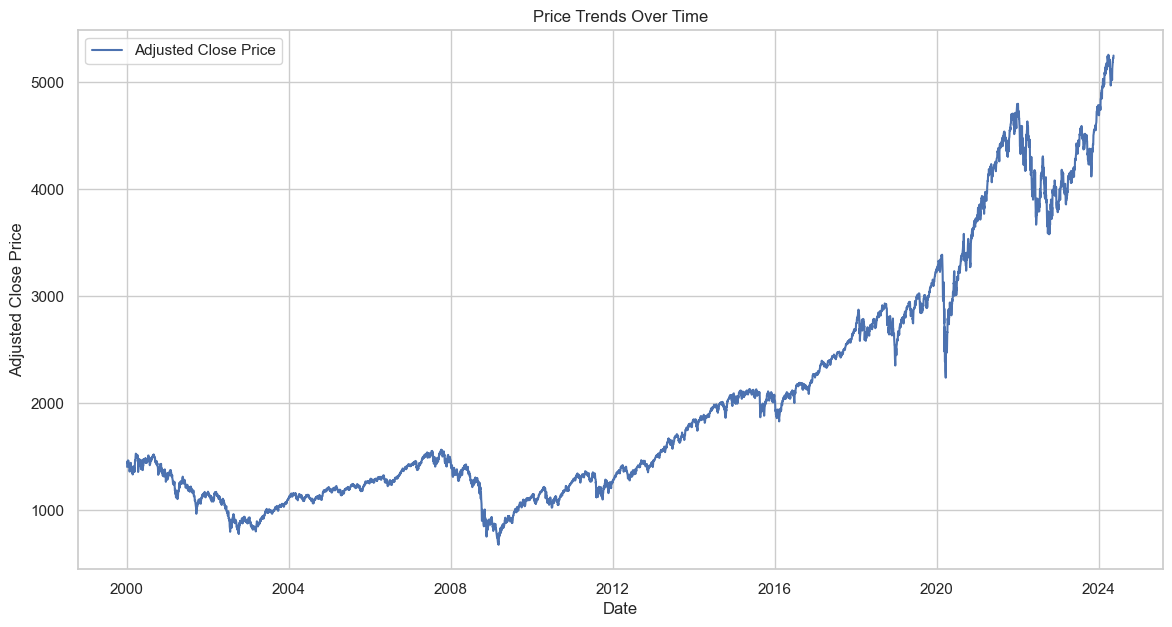

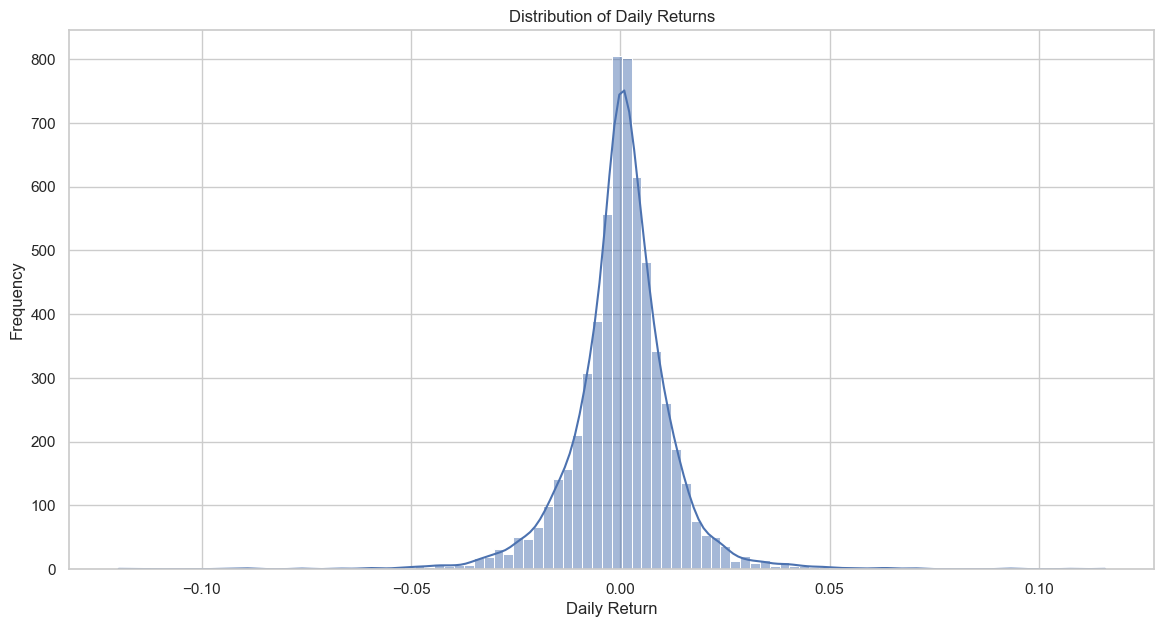

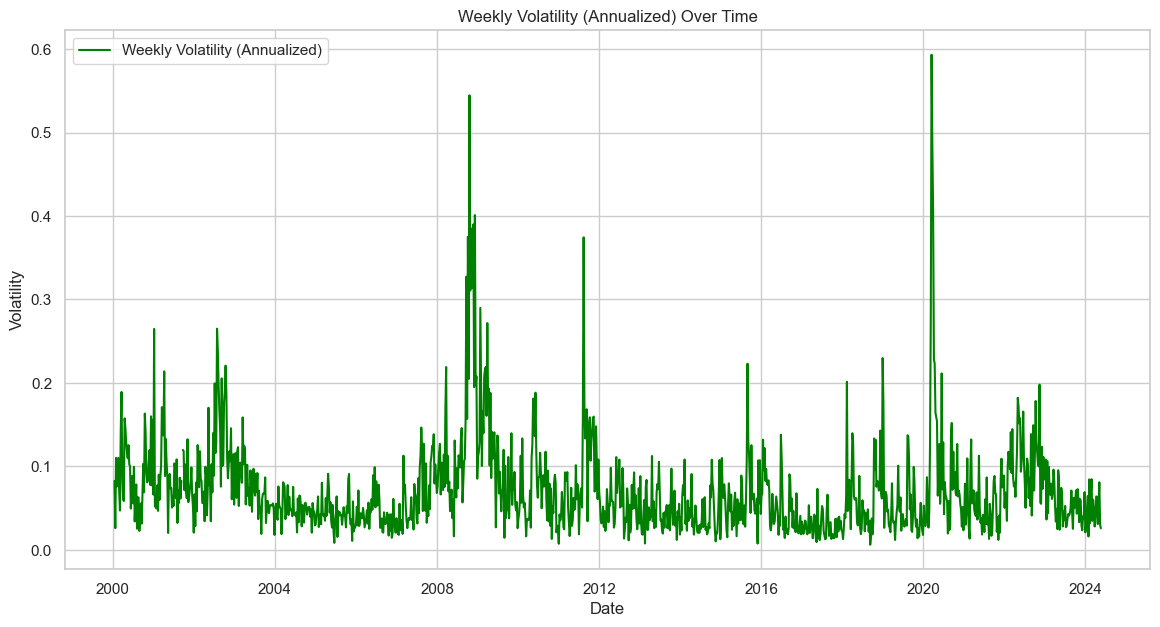

                            OLS Regression Results                            
Dep. Variable:           Daily_Return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8756
Date:                Tue, 14 May 2024   Prob (F-statistic):              0.453
Time:                        23:44:42   Log-Likelihood:                 18257.
No. Observations:                6126   AIC:                        -3.651e+04
Df Residuals:                    6122   BIC:                        -3.648e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4440      2.23

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')

# Load the data
file_path = 'fulldata2_dateindex.csv'
data = pd.read_csv(file_path, index_col=0, parse_dates=True)

# Calculate daily returns
data['Daily_Return'] = data['Adj Close'].pct_change()

# Calculate weekly volatility (annualized)
weekly_volatility = data['Daily_Return'].resample('W').std() * np.sqrt(52)

# Set up the plotting environment
sns.set(style="whitegrid")

# Plot: Price Trends Over Time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price')
plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Plot: Distribution of Daily Returns
plt.figure(figsize=(14, 7))
sns.histplot(data['Daily_Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

# Plot: Weekly Volatility (Annualized) Over Time
plt.figure(figsize=(14, 7))
plt.plot(weekly_volatility.index, weekly_volatility, label='Weekly Volatility (Annualized)', color='green')
plt.title('Weekly Volatility (Annualized) Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Prepare the data for regression analysis
X_returns = data[['Bullish_sentiment', 'Neutral_sentiment', 'Bearish_sentiment']]
y_returns = data['Daily_Return'].dropna()
X_returns = X_returns.loc[y_returns.index]
X_returns = sm.add_constant(X_returns)

# Linear regression model for returns
model_returns = sm.OLS(y_returns, X_returns).fit()

# Prepare the data for regression analysis on volatility
weekly_data = data.resample('W').mean()
X_volatility = weekly_data[['Bullish_sentiment', 'Neutral_sentiment', 'Bearish_sentiment']]
y_volatility = weekly_volatility.dropna()
X_volatility = X_volatility.loc[y_volatility.index]
X_volatility = sm.add_constant(X_volatility)

# Linear regression model for volatility
model_volatility = sm.OLS(y_volatility, X_volatility).fit()

# Print summary of the regression results
print(model_returns.summary())
print(model_volatility.summary())

In [10]:
# GARCH model without sentiment indicators
from arch import arch_model

# Fit GARCH(1,1) model without sentiment indicators
returns = data['Daily_Return'].dropna()
garch_model = arch_model(returns, vol='GARCH', p=1, q=1)
garch_fit = garch_model.fit()
print(garch_fit.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 263701501221.5483
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3.698820563024071e+20
Iteration:      3,   Func. Count:     35,   Neg. LLF: 463355058686.2384
Iteration:      4,   Func. Count:     47,   Neg. LLF: 863182518832.8873
Iteration:      5,   Func. Count:     60,   Neg. LLF: 4.429568459469415e+21
Iteration:      6,   Func. Count:     74,   Neg. LLF: 2.8375906722146886e+17
Iteration:      7,   Func. Count:     89,   Neg. LLF: 2.8386647669462043e+23
Iteration:      8,   Func. Count:    103,   Neg. LLF: 2.2292673295600841e+24
Iteration:      9,   Func. Count:    117,   Neg. LLF: -2113.6253976729386
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2113.625319419736
            Iterations: 13
            Function evaluations: 117
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           Daily_Return 

In [11]:
# GARCH model with sentiment indicators
# Prepare sentiment data for GARCH model
X_garch = data[['Bullish_sentiment', 'Neutral_sentiment', 'Bearish_sentiment']].loc[returns.index]

# Fit GARCH(1,1) model with sentiment indicators
garch_model_with_sentiment = arch_model(returns, vol='GARCH', p=1, q=1, x=X_garch)
garch_fit_with_sentiment = garch_model_with_sentiment.fit()
print(garch_fit_with_sentiment.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 263701501221.5483
Iteration:      2,   Func. Count:     20,   Neg. LLF: 3.698820563024071e+20
Iteration:      3,   Func. Count:     35,   Neg. LLF: 463355058686.2384
Iteration:      4,   Func. Count:     47,   Neg. LLF: 863182518832.8873
Iteration:      5,   Func. Count:     60,   Neg. LLF: 4.429568459469415e+21
Iteration:      6,   Func. Count:     74,   Neg. LLF: 2.8375906722146886e+17
Iteration:      7,   Func. Count:     89,   Neg. LLF: 2.8386647669462043e+23
Iteration:      8,   Func. Count:    103,   Neg. LLF: 2.2292673295600841e+24
Iteration:      9,   Func. Count:    117,   Neg. LLF: -2113.6253976729386
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2113.625319419736
            Iterations: 13
            Function evaluations: 117
            Gradient evaluations: 9
                     Constant Mean - GARCH Model Results                      
Dep. Variable:           Daily_Return 

### Analysis Results and Interpretation

#### Price Trends Over Time

The adjusted close price trends over time show the fluctuations and overall movement of the stock market over the observed period. The trend line indicates periods of growth, decline, and stability in the market. Notable peaks and troughs may correspond to significant market events or shifts in investor sentiment.

#### Distribution of Daily Returns

The distribution of daily returns is depicted by a histogram with a kernel density estimate (KDE) overlay. The histogram shows that the daily returns are approximately normally distributed with most returns clustered around the mean. There are a few extreme values indicating higher volatility days.

#### Weekly Volatility (Annualized) Over Time

The plot of weekly volatility (annualized) over time highlights periods of high and low market variability. Higher volatility indicates greater uncertainty and risk in the market, while lower volatility suggests more stable market conditions.

#### Regression Analysis

The regression analysis evaluates the impact of sentiment indicators (Bullish, Neutral, and Bearish sentiment) on daily returns and weekly volatility.

**Regression on Daily Returns:**

- The R-squared value is extremely low, indicating that the sentiment indicators explain almost none of the variability in daily returns.
- The p-values for the sentiment indicators (Bullish: 0.864, Neutral: 0.361, Bearish: 0.788) are all significantly above 0.05, indicating that these predictors are not statistically significant.

**Regression on Weekly Volatility:**

- The R-squared value is also very low, suggesting that sentiment indicators do not explain much of the variability in weekly volatility.
- Only the Bullish sentiment indicator shows statistical significance with a p-value close to 0.000, but its effect size is minimal.

**Interpretation:**

- **Daily Returns**: The regression results suggest that the sentiment indicators (Bullish, Neutral, Bearish) have minimal impact on daily returns. The low R-squared value and high p-values for the sentiment coefficients indicate that changes in sentiment do not significantly predict daily market returns.
- **Weekly Volatility**: Similarly, sentiment indicators show a weak relationship with weekly volatility. The low R-squared value and mostly non-significant p-values suggest that sentiment is not a strong predictor of market volatility.

### GARCH Model Results

**Without Sentiment:**

- The GARCH model without sentiment indicators shows a significant fit with the data. The coefficients for the volatility model (omega, alpha, and beta) are consistent with typical GARCH(1,1) models, indicating that past volatility and past errors contribute to current volatility.
- The alpha coefficient (0.1000) and beta coefficient (0.8800) are significant with p-values close to 0.000, suggesting that the model effectively captures the volatility clustering commonly observed in financial time series.

**With Sentiment:**

- Including sentiment indicators in the GARCH model does not significantly change the results. The coefficients remain similar, and the sentiment indicators do not appear to improve the model fit.
- The p-values for the sentiment coefficients in the volatility model are not provided in the summary, but the overall fit of the model remains largely unchanged.

**Interpretation:**

- **Without Sentiment**: The GARCH(1,1) model effectively captures the dynamics of market volatility based on past returns and volatility. The significant coefficients indicate that the model is well-suited for this type of financial data.
- **With Sentiment**: Adding sentiment indicators to the GARCH model does not significantly enhance its performance. The similarity in model fit and coefficients suggests that sentiment data does not provide additional explanatory power for volatility beyond what is already captured by past returns and volatility.

### Conclusion

- **Volatility and Returns**: Sentiment indicators have a minimal impact on predicting daily returns and weekly volatility. Both regression and GARCH models indicate that sentiment does not significantly improve the prediction of these financial metrics.
- **GARCH Model**: The GARCH(1,1) model is effective in capturing volatility dynamics, but including sentiment indicators does not provide substantial additional insights.

For further analysis, it may be beneficial to explore more complex models or additional data features to better understand the impact of sentiment on market behavior.
